# Designing a plagiarism detector

### Question 1
Provide justification for why the chosen value of q makes sense with regards to the table size. Other design choices should be thoroughly justified, including but not limited to: the hash table’s size,
data structures used, and any additional Python functions.

### Answer
Variable m corresponds to the size of the hash table. It has to be a prime number because a division method is used here, so the remainder of division in case of making m a non-prime number might be repetitive and lead to many collisions. Therefore, a big enough prime number is used for the size of the table and modulo operation. Choice of the value of m depends on the length of the longest string passed to the function to ensure there are no collisions that impact the correctness of the algorithm's output. Polynomial hashing is used to convert strings into integers, and the base was chosen to be a prime number 31 to create a unique integer and use rolling hashing. 31 was selected as it can be helpful to represent the length of the English alphabet with 26 letters, as all strings are put lowercase, so uppercase letters are not accounted for.

I used Object-Oriented Approach in the solution, separating the class HashTable and HashTableNode to make changes to the hash table without making changes to the nodes. Next, chaining was chosen as a strategy for collision resolution. The reason for that is to draw a comparison of runtime and applicability with open addressing in the second version of the algorithm. 

In [156]:
class HashTable1:
    '''
    This hash table stores the key-value pairs, where 
    values are nodes of class HashTableNode.
    
    Parameters
    ----------
    m: int
        Size of the hash table.
        
    Methods
    -------
    hash_function(self,key)
        Calculates the hash code of the key using polynomial approach.
        
    rolling_hashing(self, prev_hash, key, prev_key)
        Calculates the hash code of the key using rolling hashing.
        
    chained_hash_insert(self, key,value)
        Inserts a key-value pair into the table, creating a node and editing the chained link if necessary.
    '''
    def __init__(self,m):
        """
        Initialization of the hash table.
        
        Parameters
        ----------
        m: int
            Size of the hash table.
        """
        self.m = m
        self.hash_table = [None for _ in range(m+1)]
    def hash_function(self, key):
        """
        Calculation of the hash code using polynomial approach.
        
        Parameters
        ----------
        key: string
            String to be converted into hash code.
        """
        #choose prime number as a base
        p = 31
        
        #initialize size of the table
        m = self.m
        
        #polynomial calculation requires different powers of base
        power_of_p = p**(len(key)-1)
        
        #variable to store hash code
        hash_val = 0

        # Loop to calculate the hash value
        # by iterating over the elements of string
        if key!="":
            for i in range(len(key)):
                #add calculated value for each letter in string
                hash_val = hash_val+(ord(key[i])*power_of_p)
                
                #change the power of p for polynomial approach
                power_of_p = power_of_p//p
        
        #return the hash code 
        return int(hash_val%self.m)
    
    def rolling_hashing(self, prev_hash,key,prev_key):
        """
        Calculation of the hash code using rolling hashing.
        
        Parameters
        ----------
        prev_hash: int
            Hash code of the previously calculated node.
        key: string
            String to be converted into hash code.
        prev_key: string
            First letter of the previously calculated node.
        """
        #use prime number as a base
        p=31
        
        #initialize size of the table
        m =self.m
        
        #use rolling hashing formula to calculate the new hash code for key
        return (((prev_hash*p+ord(key[-1]))%m)-ord(prev_key)*(p**(len(key))%m))%m
        
    def chained_hash_insert(self, key, value):
        """
        Insert key-value pair into the hash table or edit the chained link.
        
        Parameters
        ----------
        key: int
            Hash code of the string added.
        value: int
            Starting index of the substring in the original text.
        """        
        #create the node to store our key and value        
        node = HashTableNode(key, value)
        
        if self.hash_table[key] is not None:
        #if there already exists another node, add the current node on top
        #make the value of the table element a list
            #check whether value of the table element is already list
            if isinstance(self.hash_table[key],list):
                
                #add new node to the list
                self.hash_table[key].append(node)
            #if it is not currently a list, turn the table element's value into a list
            else:
                original=self.hash_table[key]
                self.hash_table[key]=[original]
                #add new node to the list
                self.hash_table[key].append(node)
        else:
            #add a table element if it did not exist before
            self.hash_table[key] = node
        
    def chained_hash_search(self, key):
        #start traversing from this node
        cur = self.hash_table[key]
        
        #create a value for found occurences
        result=[]
        
        #check whether such element exists in the hash table
        
        if cur is not None:
            
            #traversing the list of nodes if there are multiple
            if isinstance(cur,list):
                for i in cur:
                    result.append(i.value)
            else:
                result.append(cur.value)
        #return the result    
        return result        

class HashTableNode1:
    '''
    This hash table node stores the key and value pairs.
    Additionally, it has the attribute next to traverse
    the linked list and go to the next node with the same key.
    '''
    def __init__(self, key, value, next = []):
        self.key = key
        self.value = value
        self.next = next

In [157]:
def clean_string(a):
    '''
    Eliminates punctuation and spaces from a string.
    
    Parameters:
    ----------
    a: string
        String to remove the unnecessary objects.
    
    Returns:
    ----------
    a: string
        String without spaces and punctuation signs.
    '''
    #identify chars to be removed
    bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-', " ","‘","’",'\n', '\r', '\t']
    
    #make the string lowercase
    a=a.lower()
    
    #remove unnecessary symbols
    a =''.join(c for c in a if c not in bad_chars)
    
    #return string
    return a

def produce_prime_number(lower,upper):
    '''
    Finds the first prime number within a range.
    
    Parameters:
    ----------
    lower: int
        Lower bound to search for a prime.
    upper: int
        Upper bound to search for a prime
    
    Returns:
    ----------
    i: int
        The first prime number within a range.
    '''
    #check within the range
    for i in range(lower, upper+1):
        
        #check whether the number is divisible by other numbers
        for j in range(2,i):
            
            #if divisible, it is not prime
            if (i%j)==0:
                break
        else:
            return i

def match_rolling_hashing(hash_table,x,y,k):
    '''
    An algorithm to utilize rolling hashing by adding letters one by one, 
    in order to calculate the hash code.
    
    Parameters:
    ---------- 
    hash_table: instance of class HashTable.
        Hash table for insertion and search.
    
    x: string
        String for inserting into hash table.
    
    y: string
        String for pattern search.
    k: int
        Length of the inspected substrings.
    
    Returns:
    ----------
    result: list of tuples
        String without spaces and punctuation signs.
    '''
    #variables to store the beginning index 
    #of inspected substring in x and y respectively
    start_t=0
    start_p=0

    #calculate initial hash codes for substrings
    hashed_p_substring=hash_table.hash_function(y[:k])
    hashed_t_substring=hash_table.hash_function(x[:k])
    
    #insert the first node into the hash table
    hash_table.chained_hash_insert(hashed_t_substring,start_t)
    
    #create a list to contain the results
    result=[]
        
    #check consecutive substring permutations of x    
    while start_t<=len(x)-k-1:
        
        #slide the beginning of the x substring by 1 character    
        start_t+=1
        
        #re-calculate hash code for x substring using rolling hashing
        hashed_t_substring=hash_table.rolling_hashing(hashed_t_substring, x[start_t:start_t+k],x[start_t-1])
        
        #insert new substring into hash table
        hash_table.chained_hash_insert(hashed_t_substring,start_t)
    
    #check consecutive substring permutations of y
    while start_p<=len(y)-k:
        
        #search for the hashed value of y substring in the hash table
        search_result=hash_table.chained_hash_search(hashed_p_substring)
        
        #if the element is present in the hash table, add it to the result
        if search_result!=[]:
            result.append((search_result,start_p))
            
        #after one substring for y is checked, slide the beginning index 
        start_p+=1
        
        #re-calculate the hash code using rolling hashing
        hashed_p_substring=hash_table.rolling_hashing(hashed_p_substring,y[start_p:start_p+k],y[start_p-1])      
        
    return result          

def rh_get_match1(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    
    Parameters
    ----------
    - x, y: strings
    - k: int, length of substring
    
    Returns
    ----------
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """
    if len(x)>len(y):
        bigger=len(x)
    else:
        bigger=len(y)
        
    if bigger*15<1000:
        bigger=1000
    else:
        bigger=bigger*15
    hash_size=produce_prime_number(bigger, bigger+100)
    
    #create a hash table
    hash_solution=HashTable1(hash_size)
    
    #remove unnecessary symbols from the strings
    x=clean_string(x)
    y=clean_string(y)
    
    #call on the algorithm
    return match_rolling_hashing(hash_solution,x,y,k)

In [158]:
#test case 1 -- Simple test
result=rh_get_match1("thedaytodayismonday","daythe",3)
print(result)

[([3, 8, 16], 0), ([4], 1), ([0], 3)]


In [159]:
#test case 2 -- Paraphrasing Plagiarism (Minor changes to original text)
x1="""New classical economics.The original theoretical impetus was the charge that
      Keynesian economics lacks microeconomic foundations -- i.e. its assertions are
      not founded in basic economic theory. This school emerged during the 1970s.
      This school asserts that it does not make sense to claim that the economy at
      any time might be "out-of-equilibrium". Fluctuations in aggregate variables follow 
      from the individuals in the society continuously re-optimizing as new information
      on the state of the world is revealed."""
y1="""Scholars in the school of new classical economics,
      which emerged in the 1970s, focus on the belief that the school
      of Keynesian economics is misguided. New classical scholars assert
      that the economy is never unbalanced, as Keynesian scholars believe,
      but instead that changes in an economy result from people's changing 
      their spending habits as they interpret the news about the world."""
result1=rh_get_match1(x1,y1,7)
print(result1)

[([340], 7), ([144], 16), ([0], 21), ([1], 22), ([2], 23), ([3], 24), ([4], 25), ([5], 26), ([6], 27), ([7], 28), ([8], 29), ([9, 215], 30), ([10], 31), ([11], 32), ([12, 75, 94, 148], 33), ([13, 76, 95, 149], 34), ([14, 77], 35), ([12, 75, 94, 148], 41), ([172], 47), ([342], 50), ([185], 56), ([186], 57), ([222], 59), ([171], 62), ([239], 80), ([11], 83), ([66], 95), ([67], 96), ([68, 267], 97), ([69], 98), ([70], 99), ([71], 100), ([72], 101), ([73], 102), ([74], 103), ([12, 75, 94, 148], 104), ([13, 76, 95, 149], 105), ([14, 77], 106), ([380], 115), ([0], 124), ([1], 125), ([2], 126), ([3], 127), ([4], 128), ([5], 129), ([355], 140), ([117], 143), ([239], 150), ([240], 151), ([241], 152), ([242, 370], 153), ([243], 154), ([244], 155), ([245], 156), ([246], 157), ([66], 183), ([67], 184), ([68, 267], 185), ([27], 227), ([73], 230), ([74], 231), ([246], 232), ([101], 248), ([28], 269), ([405], 311), ([406], 312)]


In [160]:
#test case 3 -- Mosaic Plagiarism (Some original ideas with plagiarised text)
x2="""Gardening in mixed beds is a great way to get the most productivity
      from a small space. Some investment is required, to purchase materials
      for the beds themselves, as well as soil and compost. The investment
      will likely pay-off in terms of increased productivity."""
y2="""If you don’t have a lot of space for a garden, raised beds can be
      a great option. Gardening in mixed beds is a great way to get the
      most productivity from a small area. Some investment is required.
      You’ll need to purchase materials for the raised beds themselves,
      as well as soil and compost. The investment will pay off, though,
      in the form of increased productivity."""
result2=rh_get_match1(x2,y2,10)
print(result2)

[([0], 61), ([1], 62), ([2, 148], 63), ([3], 64), ([4], 65), ([5], 66), ([6, 53], 67), ([7], 68), ([8], 69), ([9], 70), ([10], 71), ([11], 72), ([12], 73), ([13], 74), ([14], 75), ([15], 76), ([16], 77), ([17], 78), ([18], 79), ([19], 80), ([20], 81), ([21], 82), ([22], 83), ([23], 84), ([24], 85), ([25], 86), ([26], 87), ([27], 88), ([28], 89), ([29], 90), ([30], 91), ([31], 92), ([32], 93), ([33], 94), ([34], 95), ([35], 96), ([36], 97), ([37], 98), ([38], 99), ([39], 100), ([40], 101), ([41], 102), ([42], 103), ([43, 202], 104), ([44, 203], 105), ([45, 204], 106), ([46], 107), ([47], 108), ([48], 109), ([49, 169], 110), ([50], 111), ([51], 112), ([52], 113), ([6, 53], 114), ([54], 115), ([55], 116), ([70], 130), ([71], 131), ([72], 132), ([73, 157], 133), ([74, 158], 134), ([75], 135), ([76], 136), ([77], 137), ([78], 138), ([79], 139), ([80], 140), ([81], 141), ([82], 142), ([83], 143), ([84], 144), ([150], 159), ([92], 161), ([93], 162), ([94], 163), ([95], 164), ([96], 165), ([97

In [161]:
#test case 4 -- Non-plagiarism (Texts on a similar topic)
x3="""While understanding the impact of COVID-19 on learning outcomes is paramount,
      so too is developing our understanding of how the pandemic has impacted the
      relationships between students, their teachers and schools – particularly in
      relation to student wellbeing and mental health. These insights are integral
      for future-proofing schools, staff and students against the impacts of disrupted
      learning caused by major events."""
y3="""The uncertainty of another pandemic year piled extra pressure on Year 12 students,
      who were faced with disruptions to their learning and traditional end-of-year
      celebrations and social events. It’s also taken its toll on teachers of this
      graduating cohort."""
result3=rh_get_match1(x3,y3,6)
print(result3)


[([106], 23), ([107], 24), ([108], 25), ([139], 39), ([148, 203, 290], 61), ([149, 204, 291], 62), ([150, 292], 63), ([317], 85), ([318], 86), ([150, 292], 98), ([38, 326], 103), ([39, 327], 104), ([40, 328], 105), ([216], 108), ([227], 116), ([131], 140), ([347], 155), ([146], 181), ([161], 182), ([162], 183), ([163], 184), ([138], 201)]


### Question 2
Provide a string reflection on what makes a good hash function. Run an experiment to give empirical evidence to support your choice for the hash function. Other design choices should be thoroughly justified, including but not limited to: the hash table’s size, data structures used, and any additional Python functions.

### Answer
A good hash function should be efficiently computable, and the keys should be distributed uniformly. Assessment of whether a hash function is good or not depends on the context of its usage. Generally, the runtime of the algorithm should be adequate to retrieve data from the hash table promptly enough, even with big hash tables analyzed. The keys should depend heavily on the entire key (as possible) to reflect the uniqueness of the key to form a good distribution of keys within the hash table to avoid collision and the incorrect output. 

In the following implementation, open addressing is used to avoid collision with quadratic probing. Quadratic probing was chosen as the primary goal was to prevent division and double hashing (which is one of the most efficient ways of open addressing). Therefore, among linear and quadratic probing, the latter was chosen to improve the algorithm's performance overall. The Mid-squares hash function is implemented to calculate the hash value. Large hash table size is chosen to ensure there is no overflow of indexes as there is no division step in the hash function in the version of the algorithm.

In [162]:
import math
class HashTable2:
    '''
    This hash table stores the key-value pairs, where 
    values are nodes of class HashTableNode.
    
    Parameters
    ----------
    m: int
        Size of the hash table.
        
    Methods
    -------
    hash_function(self,key)
        Calculates the hash code of the key using mid-squares method.
        
    probing_sequence(self, key,i)
        Generates the sequence of slots examined. 
    
    open_addressing_insert(self,key,value)
        Inserts a key-value pair into the hash table if an empty slot is found.
        
    open_addressing_search(self,key,value)
        Goes through a hash table to find whether an item with such key exists.
    '''
    def __init__(self, m):
        """
        Initialization of the hash table.
        
        Parameters
        ----------
        m: int
            Size of the hash table.
        """
        self.m = m
        self.hash_table = [None for _ in range(m)]
    def hash_function(self, key):
        """
        Calculation of the hash code using mid-squares approach.
        
        Parameters
        ----------
        key: string
            String to be converted into hash code.
            
        Return
        ----------
        hash_value: int
            Hash code calculated using mid-squares approach.
            
        """  
        p=2
        hash_value=0
        for i in range(len(key)):
            hash_value += math.sqrt(ord(key[len(key) -i -1])*p**i)
        return int(round(hash_value,0))
    def probing_sequence(self, key, i):
        """
        Generates the sequence to examine slots.
        
        Parameters
        ----------
        key: string
            String to be converted into hash code.
        i: int
            Integer value for the position of calculation of slot.
        """  
        return (self.hash_function(key) + i+i**2) % self.m
    def open_addressing_insert(self, key, value):
        """
        Inserts a key-value pair into the hash table if an empty slot is found.
        
        Parameters
        ----------
        key: string
            Key to be inserted into hash table.
        value: int
            Value of the inserted key.
        """          
        
        i = 0
        while i < self.m:
            j = self.probing_sequence(key, i)
            #if we find an empty slot
            if self.hash_table[j] is None:
            #we insert the key-value pair into the hash table
                self.hash_table[j] = HashTableNode(key, value)
                return
        #else we increase i and continue probing
            i += 1
        raise Exception("All slots in hash table is filled!")
    def open_addressing_search(self, key, value):
        """
        Examine a hash table to find whether an item with such key exists.
        
        Parameters
        ----------
        key: string
            Key to check for in the hash table.
        value: int
            Value of the checked key.
        """          
        
        i = 0
        result=[]
        while i < self.m:
            #we go through all slots
            j = self.probing_sequence(key, i)
            if self.hash_table[j] is None:
                #until we find an empty one, which means the value doesn't exist
                break
            if self.hash_table[j].key == key:
                #or we find the value itself
                result.append(self.hash_table[j].value[1])
            i += 1
        return result
class HashTableNode2:
    '''
    This hash table node stores the key and value pairs.
    
    '''
    def __init__(self, key, value):
        self.key = key
        self.value = value

In [163]:
def clean_string(a):
    '''
    Eliminates punctuation and spaces from a string.
    
    Parameters:
    ----------
    a: string
        String to remove the unnecessary objects.
    
    Returns:
    ----------
    a: string
        String without spaces and punctuation signs.
    '''
    #identify chars to be removed
    bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-', " ","‘","’",'\n', '\r', '\t']
    
    #make the string lowercase
    a=a.lower()
    
    #remove unnecessary symbols
    a =''.join(c for c in a if c not in bad_chars)
    
    #return string
    return a
def rh_get_match2(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    Input:
    - x, y: strings
    - k: int, length of substring
    Output:
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """
    #create a has
    hash_solution=HashTable2(120000)
    result=[]
    
    #clean the strings from extra charachters
    x=clean_string(x)
    y=clean_string(y)
    
    #insert the substrings from x into the hash table
    i=0
    while i<=len(x)-k:            
        value=[x[i:i+k], i,i+k-1]
        hash_solution.open_addressing_insert(x[i:i+k], value)
        i+=1
    
    #create a list of lists with substrings of y and their starting indeces
    j=0
    y_substrings=[]
    while j<=len(y)-k:            
        y_substrings.append([y[j:j+k],j])
        j+=1
    
    #search for substrings of y in the hash table
    for i in y_substrings:
        search_result=hash_solution.open_addressing_search(i[0],None)
        if search_result!=[]:
            result.append((search_result,i[1]))
    return result

In [164]:
#test case 1 -- Simple test
result=rh_get_match2("thedaytodayismonday","daythe",3)
print(result)

[([3, 8, 16], 0), ([4], 1), ([0], 3)]


In [165]:
#test case 2 -- Paraphrasing Plagiarism (Minor changes to original text)
x1="""New classical economics.The original theoretical impetus was the charge that
      Keynesian economics lacks microeconomic foundations -- i.e. its assertions are
      not founded in basic economic theory. This school emerged during the 1970s.
      This school asserts that it does not make sense to claim that the economy at
      any time might be "out-of-equilibrium". Fluctuations in aggregate variables follow 
      from the individuals in the society continuously re-optimizing as new information
      on the state of the world is revealed."""
y1="""Scholars in the school of new classical economics,
      which emerged in the 1970s, focus on the belief that the school
      of Keynesian economics is misguided. New classical scholars assert
      that the economy is never unbalanced, as Keynesian scholars believe,
      but instead that changes in an economy result from people's changing 
      their spending habits as they interpret the news about the world."""
result1=rh_get_match2(x1,y1,7)
print(result1)

[([340], 7), ([0], 21), ([1], 22), ([2], 23), ([3], 24), ([4], 25), ([5], 26), ([6], 27), ([7], 28), ([8], 29), ([9], 30), ([10], 31), ([11], 32), ([12, 75, 94, 148], 33), ([13, 76, 95, 149], 34), ([14, 77], 35), ([172], 47), ([185], 56), ([186], 57), ([239], 80), ([66], 95), ([67], 96), ([68], 97), ([69], 98), ([70], 99), ([71], 100), ([72], 101), ([73], 102), ([74], 103), ([12, 75, 94, 148], 104), ([13, 76, 95, 149], 105), ([14, 77], 106), ([0], 124), ([1], 125), ([2], 126), ([3], 127), ([4], 128), ([5], 129), ([117], 143), ([239], 150), ([240], 151), ([241], 152), ([242], 153), ([243], 154), ([244], 155), ([245], 156), ([246], 157), ([66], 183), ([67], 184), ([68], 185), ([73], 230), ([74], 231), ([246], 232), ([405], 311), ([406], 312)]


In [166]:
#test case 3 -- Mosaic Plagiarism (Some original ideas with plagiarised text)
x2="""Gardening in mixed beds is a great way to get the most productivity
      from a small space. Some investment is required, to purchase materials
      for the beds themselves, as well as soil and compost. The investment
      will likely pay-off in terms of increased productivity."""
y2="""If you don’t have a lot of space for a garden, raised beds can be
      a great option. Gardening in mixed beds is a great way to get the
      most productivity from a small area. Some investment is required.
      You’ll need to purchase materials for the raised beds themselves,
      as well as soil and compost. The investment will pay off, though,
      in the form of increased productivity."""
result2=rh_get_match2(x2,y2,10)
print(result2)

[([0], 61), ([1], 62), ([2], 63), ([3], 64), ([4], 65), ([5], 66), ([6], 67), ([7], 68), ([8], 69), ([9], 70), ([10], 71), ([11], 72), ([12], 73), ([13], 74), ([14], 75), ([15], 76), ([16], 77), ([17], 78), ([18], 79), ([19], 80), ([20], 81), ([21], 82), ([22], 83), ([23], 84), ([24], 85), ([25], 86), ([26], 87), ([27], 88), ([28], 89), ([29], 90), ([30], 91), ([31], 92), ([32], 93), ([33], 94), ([34], 95), ([35], 96), ([36], 97), ([37], 98), ([38], 99), ([39], 100), ([40], 101), ([41], 102), ([42], 103), ([43, 202], 104), ([44, 203], 105), ([45, 204], 106), ([46], 107), ([47], 108), ([48], 109), ([49], 110), ([50], 111), ([51], 112), ([52], 113), ([53], 114), ([54], 115), ([55], 116), ([70], 130), ([71], 131), ([72], 132), ([73, 157], 133), ([74, 158], 134), ([75], 135), ([76], 136), ([77], 137), ([78], 138), ([79], 139), ([80], 140), ([81], 141), ([82], 142), ([83], 143), ([84], 144), ([92], 161), ([93], 162), ([94], 163), ([95], 164), ([96], 165), ([97], 166), ([98], 167), ([99], 16

In [167]:
#test case 4 -- Non-plagiarism (Texts on a similar topic)
x3="""While understanding the impact of COVID-19 on learning outcomes is paramount,
      so too is developing our understanding of how the pandemic has impacted the
      relationships between students, their teachers and schools – particularly in
      relation to student wellbeing and mental health. These insights are integral
      for future-proofing schools, staff and students against the impacts of disrupted
      learning caused by major events."""
y3="""The uncertainty of another pandemic year piled extra pressure on Year 12 students,
      who were faced with disruptions to their learning and traditional end-of-year
      celebrations and social events. It’s also taken its toll on teachers of this
      graduating cohort."""
result3=rh_get_match2(x3,y3,6)
print(result3)

[([106], 23), ([107], 24), ([108], 25), ([148, 203, 290], 61), ([149, 204, 291], 62), ([150, 292], 63), ([317], 85), ([318], 86), ([38, 326], 103), ([39, 327], 104), ([40, 328], 105), ([216], 108), ([131], 140), ([347], 155), ([161], 182), ([162], 183), ([163], 184)]


### Question 3
Carefully describe how you would use the code above to investigate the extent of plagiarism. Enumerate
potential pitfalls and challenges of applying this algorithm for real-life use (you can also compare both of
these algorithms with a more brute-force approach to plagiarism detection; if you do this, make sure to
describe how such approach would work and why it wouldn’t be very appealing from a computational
standpoint). Make sure you justify all the assumptions you make.

### Answer
The developed algorithms can be used to analyze plagiarism by looking at how many substrings consecutively are repeated among two strings (and how long the total shared substring is). This way, it is possible to analyze the percentage of text plagiarised by dividing the length of the shared substrings by the entire length of the original string (that is examined for plagiarism).

Nevertheless, there are some limitations to the algorithm, including:
1. Citations are not considered plagiarism. However, the algorithm does not account for that, so the result might be incorrect as quotes will be flagged as substrings in common. One of the ways to tackle the issue is to create a conditional statement that would check whether a reference to the author(s) is made.
2. Next, plagiarism might consist of taking parts of text from several resources. Still, the algorithm only compares two strings between each other, giving a limitation on the analysis of how plagiarized the text is. It is possible to run the algorithm on several texts one by one, keeping the checked text unchanged, but one of the steps is to find the papers to compare with. 
3. Lastly, a more significant issue related to plagiarism detectors, in general, is that the context and punctuation of the compared texts are not taken into account. Therefore, it may lead to false flagging of plagiarism. It is pretty challenging to resolve the issue without the use of specific Artificial Intelligence components integrated. Nevertheless, it should not be a problem with long texts, as the issue of context is quite unlikely to appear frequently.

### Question 4
Discuss the time complexity of each algorithmic version. Compare and contrast the two versions by
experimenting on self-generated inputs. You are encouraged to generate inputs of various natures as that
would be more likely to tease out the strengths and/or weaknesses of the versions.

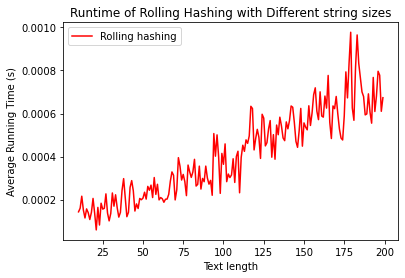

In [168]:
#experimental results
import random
import time
import matplotlib.pyplot as plt
def create_plagiarized_texts(length1,length2):
    """
    Create plagiarized texts randomly with given lengths for strings.
    Parameters
    ----------
    length1: int
        Length of the first string to create.
    length2: int
        Lenght of the second string to create.
    
    Return
    ----------
    x: string
        Randomly generated string with given length.
    y: string
        Plagiarized string with given length.
    """          
    #create strings    
    x=""
    y=""
    
    #create original string by generating random ASCII code
    for i in range(length1):
        letter_ascii=random.randrange(97,122)
        x+=chr(letter_ascii)
     
    #create plagiarized string by copying parts of random length from string x
    while len(y)<length2:
        copy_length=random.randrange(3,10)
        start_index=random.randrange(0,length1-1)
        y+=x[start_index:start_index+copy_length]
        
    #return strings
    return x,y
        
x=[]
y1=[]
y2=[]

#for various text length of x (hash table size depends on it for rolling hashing)
for i in range(10, 200):
    average_time_alg1=0
    average_time_alg2=0
    str1,str2=create_plagiarized_texts(i, i//2)
    
    #average out the runtime for more accurate results
    for j in range(50):
        start1=time.time()
        rh_get_match1(str1,str2,5)
        end1=time.time()
        average_time_alg1+=end1-start1
        
        start2=time.time()
        rh_get_match2(str1,str2,5)
        end2=time.time()
        average_time_alg2+=end2-start2
    y1.append(average_time_alg1/50)
    y2.append(average_time_alg2/50)
    x.append(i)

plt.plot(x, y1, color = 'red', label = "Rolling hashing")

# plot the legend, title, and axis for the plot
plt.ylabel("Average Running Time (s)")
plt.xlabel("Text length")
plt.title("Runtime of Rolling Hashing with Different string sizes")
plt.legend()
plt.show()

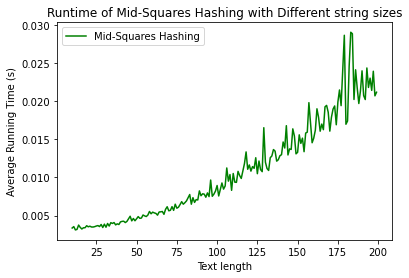

In [169]:
plt.plot(x, y2, color = 'green', label = "Mid-Squares Hashing")
plt.ylabel("Average Running Time (s)")
plt.xlabel("Text length")
plt.title("Runtime of Mid-Squares Hashing with Different string sizes")
plt.legend()
plt.show()

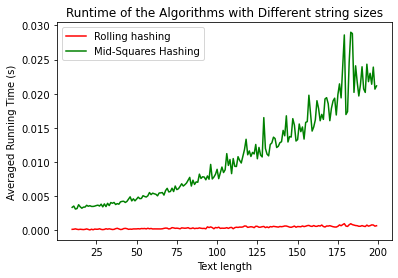

In [170]:
plt.plot(x, y1, color = 'red', label = "Rolling hashing")
plt.plot(x, y2, color = 'green', label = "Mid-Squares Hashing")
plt.ylabel("Averaged Running Time (s)")
plt.xlabel("Text length")
plt.title("Runtime of the Algorithms with Different string sizes")
plt.legend()
plt.show()

### Answer
#### Algorithm 1
Initial hashing would take O(len(substring)) time, as polynomial hashing is used, where every element is multiplied by a specific power of base and summed. However, it would only occur once for the first inserted substring.

Rolling hashing for a substring would take O(1) time as it takes data about the previous hash code and creates a new hash code by manipulating the previous hash code, the first letter of the previous element, and the last letter of the new element.

Insertion always has a time complexity of O(1). The only thing that is required to do is create an instance of class HashTableNode - O(1), check whether node with the same hash code exists - O(1), and if so, append the previous value of the hash table element to the attribute next - O(1). Lastly, the hash table element is either created or edited to contain information about the node - O(1). Therefore, the total runtime is asymptotically - O(1).

The best case of searching for one specific substring in the hash table is O(1), as if the hash code of the substring exists in the hash table and it does not have a chained link list, the retrieval will take - O(1). The worst-case scenario would be that all substrings (n) would have the same hash code and will be stored in a chained link list, leading to the time complexity of O(n). However, such a case is highly improbable as polynomial hashing is used, and it typically produces unique hash codes sufficiently. 

Total: Total procedure of inserting all substrings from x with length k (in total (len(x)-k+1) using rolling hashing would take O(len(x)-k+1)*O(1) runtime. Next, procedure of separating y into substrings of length k would take O(len(y)-k+1) time, whereas finding the hashed code for the substrings would result in total time complexity O(len(y)-k+1)*O(1)+. Searching for shared substrings would take O(len(y)-k+1)*O(1+r), where r is the number of elements in the chained linked array for every element in the hash table. Therefore, total time complexity would be: O(len(x)-k+1)*O(1) +O(len(y)-k+1)*O(1)+ O(len(y)-k+1)*O(1+r)=O(len(x)-k+1)+O(r(len(y)-k+1)), which corresponds to linear behavior, as seen from experimental results.

#### Algorithm 2
Under the assumption of simple uniform hashing:

Hashing for any substring would take O(len(substring)) time as every letter is calculated individually and then summed. The length of the substring is k, so it would be O(k) time.

Insertion would take O(1) time in the best case when the element with the given hash code does not yet exist in the table. The worst time complexity would be O(m), where m is the total size of the table in case the whole table is full, and there is nowhere to place the inserted element. If a collision occurs, quadratic probing is used to check whether the next slots are not occupied.

Search requires a search among the first key-value pair, and later probing is used to check other slots to analyze whether there are other instances of the same substring in the table. Therefore, time complexity depends on the size of the table and the probing equation. 

Asymptotically, runtime behavior is linear, as seen from experimental results.

#### Comparison of two algorithms
From experimental results it is clear that the first algorithm performs significantly better, even though the asymptotic behavior of both functions is linear. The differences can be explained by the hash table sizes, as the second algorithm has significantly bigger table size. Further, insertion of the first algorithm always takes O(1) time, whereas it is different for the second algorithm that uses open addressing.


#### Comparison of two collision methods

In comparison, the two collision techniques show several pros and cons:
- Overflow of the hash table:Chaining: table never fills up because more elements can be added to the chain, while open addressing is prone to overflow as the table might become full.
- Memory usage: Chaining requires more space as not all slots are potentially filled, and every element might have an array of chained elements. In contrast, open addressing uses the size of the table at maximum to store all elements.

It is difficult to assess efficiency of the two approaches as they use different hashing functions. Yet, as seen from time complexity analysis, insertion time complexity of Chaining approach is more consistent and always equals O(1). However, collisions are handled more effectively by the Open Addressing method. In terms of memory complexity, Open Addressing is also more efficient than Chaining approach as it does not require additional space for the chain linked list (and does not waste space in the hash table) but it rather uses only the slots within the hash table.


#### Comparison of Hash Tables to Other Data Structures
An obvious advantage of Hash Tables in comparison to many other data structures (On average: BSTs: O(log n), Red-Black Trees: O(log n), AVL Trees: O(log n)) is its time complexity to insert, search, delete elements, which is O(1) on average. Nevertheless, one of the biggest problems in Hash Tables is the possibility of collision and incorrect output. Further, implementation of hashing functions that produce unique keys for large text size is quite expensive in terms of memory and time complexity.

